In [89]:
pip install konlpy

In [90]:
import pandas as pd
import numpy as np
import tensorflow as tf
from konlpy.tag import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [91]:
df = pd.read_excel('대화_데이터셋.xlsx')

In [92]:
df = df[df['Emotion'] != '놀람'].reset_index(drop=True)
df

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468,Unnamed: 7,Unnamed: 8
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0,NaN,NaN
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0,혐오,5429.0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0,NaN,NaN
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0,NaN,NaN
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
27262,유느님 내일 이면 해피투게더가하네요~^^,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27263,승관아~ 너에게 편지를 안 쓸 수가 없네.,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27264,패떴 개그계 큰 대모 이경실 씨 1탄 잘 봤습니다,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27265,유재석 오라버니 해피투게더 해피파출소 편 봤어요,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df['Emotion'].value_counts()

행복    6037
분노    5665
공포    5468
슬픔    5267
중립    4830
Name: Emotion, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Emotion_encoder'] = encoder.fit_transform(df['Emotion'].values)
df

,Sentence,Emotion,Unnamed: 2,Unnamed: 3,Unnamed: 4,공포,5468,Unnamed: 7,Unnamed: 8,Emotion_encoder
0,언니 동생으로 부르는게 맞는 일인가요..??,공포,NaN,NaN,NaN,놀람,5898.0,NaN,NaN,0
1,그냥 내 느낌일뿐겠지?,공포,NaN,NaN,NaN,분노,5665.0,혐오,5429.0,0
2,아직너무초기라서 그런거죠?,공포,NaN,NaN,NaN,슬픔,5267.0,NaN,NaN,0
3,유치원버스 사고 낫다던데,공포,NaN,NaN,NaN,중립,4830.0,NaN,NaN,0
4,근데 원래이런거맞나요,공포,NaN,NaN,NaN,행복,6037.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
27262,유느님 내일 이면 해피투게더가하네요~^^,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
27263,승관아~ 너에게 편지를 안 쓸 수가 없네.,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
27264,패떴 개그계 큰 대모 이경실 씨 1탄 잘 봤습니다,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
27265,유재석 오라버니 해피투게더 해피파출소 편 봤어요,행복,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [95]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
onehotencoder = OneHotEncoder(sparse=False)
result = df['Emotion']

In [96]:
result.shape

(27267,)

In [97]:
result.values.reshape(-1, 1).shape

(27267, 1)

In [98]:
onehotencoder.fit(result.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [99]:
one_hot_encoded = onehotencoder.transform(result.values.reshape(-1, 1))
one_hot_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [100]:
train_Y = one_hot_encoded
train_Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [101]:
sentence = list(df['Sentence'].values)
sentence

['언니 동생으로 부르는게 맞는 일인가요..??',
 '그냥 내 느낌일뿐겠지?',
 '아직너무초기라서 그런거죠?',
 '유치원버스 사고 낫다던데',
 '근데 원래이런거맞나요',
 ' 남자친구가 떠날까봐요',
 '이거 했는데 허리가 아플수도 있나요? ;;',
 '내가불안해서꾸는걸까..',
 ' 일주일도 안 남았당...ㅠㅠ',
 '약은 최대한 안먹으려고 하는데좋은 음시있나요?0',
 ' 구직활동 하면서 남는시간은 뭘로 활용해야 되지..',
 '괜찮은분 같아서 괜히 조급해지네요 ㅜ',
 ' 제가 스타일을 바꾸면 더 어색하게만 변할것같아서 ㅠ0',
 '아내 있으면 여자 있는 술집가면 법 적으로 문제있나요?',
 ' 한소리들을지.... 도와주세요',
 '도와주실분 없나요..',
 '그냥 잡다한거말고학업에 관련된거 듣는게 더 좋은가요?',
 ' 가격은 반값....이거 질이 다른건가요??',
 '마지막에 말씀 드렸던대로 글은 이제 내릴게요의도치않게 실시간베스트글에 올라가서 남친이 볼거 같아서요 ㅠㅠ',
 '화장품회사다보니, 젊은 여자들이 많은거 같은데 걱정이네요..',
 ' 몸무게 1키로찌는건 아니겠죠?',
 'o자 다리 많이 심한가요?',
 ' 안하는게 나을까요??',
 '그정도로 더러운가요.........',
 ' 보통 가진통도 이렇게 오래가나요?',
 '여자가 술취해서 먼저 전화하는거 짜증나요???',
 '걱정이 큽니다',
 '이거 무슨 증상이죠??ㅜㅜ',
 ' 다름 아니라 제동생 걱정 입니다',
 '아무래도 무리겠죠?',
 '애인으로써 정말 걱정됩니다',
 '이러다 일주일전에 나오는거 아닌가몰라요',
 '경고먹을까 고민0',
 '극도로 예민하고 불안한 상태에요',
 ' 못받으면 어떡하죠',
 ' 안검하수도어울릴까요?',
 '근데 그게 사마귀 일수 있데요.',
 '이제 곧 내년이면 22살인 여대생입니다...요즘 고민이 있는데요...',
 ' 안하는게 좋은가요?',
 '자제할수있는 방법 뭐 없을까요??',
 '집에와서 또 운동하긴했는데지난 3주의 노력이 물거품이 될까봐

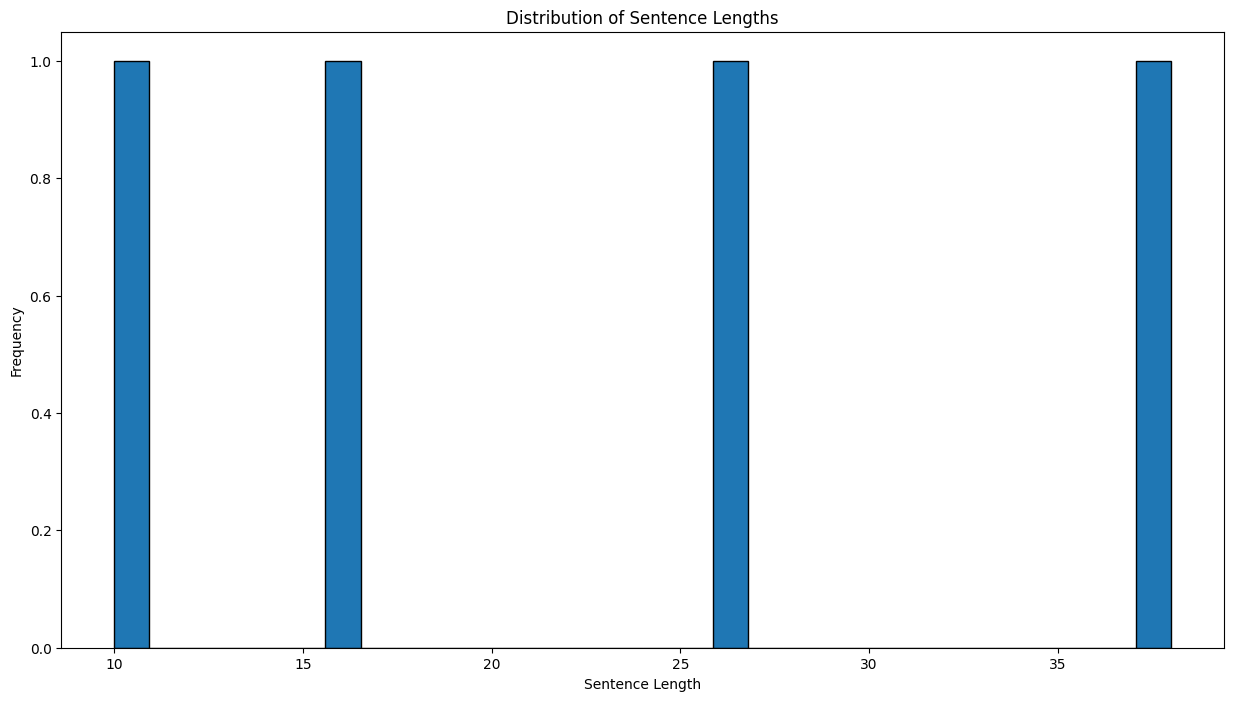

Number of sentences with length <= 10: 1


In [ ]:
import matplotlib.pyplot as plt

def plot_sentence_lengths(sentences):
    # 문장 길이 계산
    sentence_len = [len(sentence) for sentence in sentences]

    # 문장 길이 오름차순 정렬
    sentence_len.sort()

    # 히스토그램 그리기
    plt.figure(figsize=(15, 8))
    plt.hist(sentence_len, bins=30, edgecolor='black')  # 히스토그램으로 변경
    plt.title('Distribution of Sentence Lengths')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.show()

    # 길이가 10 이하인 문장 수 출력
    short_sentences_count = sum(1 for length in sentence_len if length <= 10)
    print(f"Number of sentences with length <= 10: {short_sentences_count}")

# 예시 데이터
example_sentences = ["This is a sample sentence.", "Short one.", "Another example.", "A very long sentence to test the code."]

# 함수 호출
plot_sentence_lengths(example_sentences)

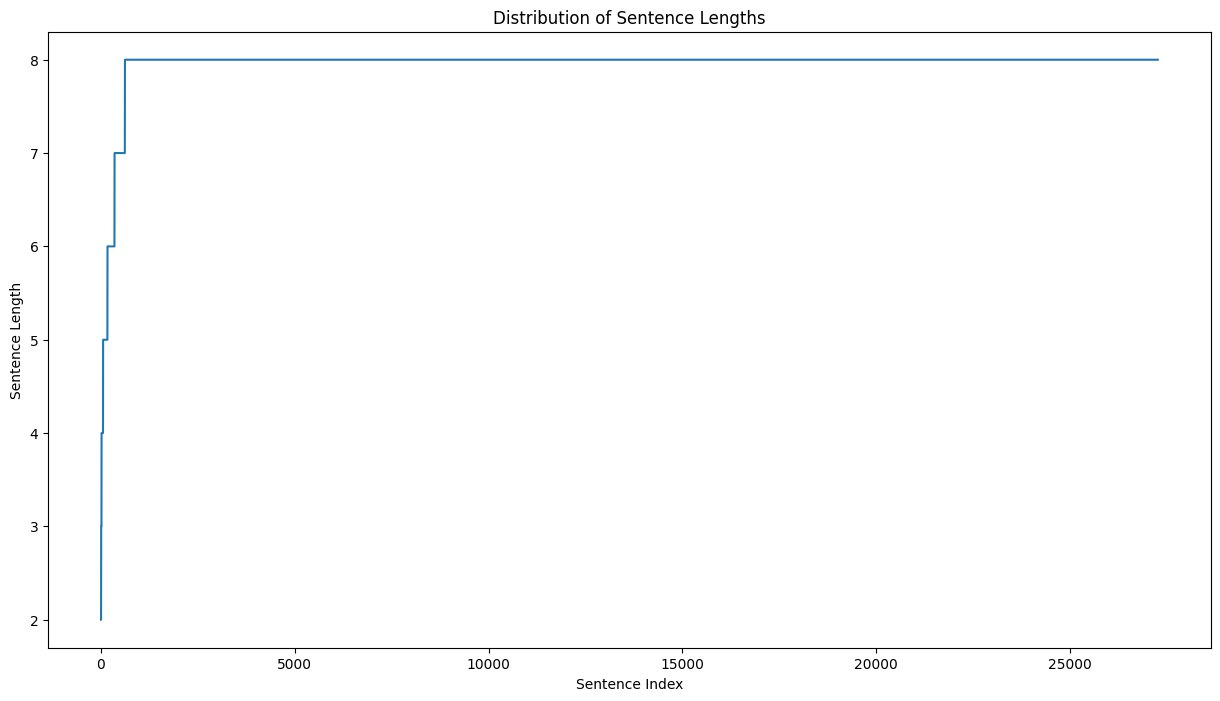

27267


In [102]:
# 각 문장의 길이 계산
sentence_len = [len(sentence) for sentence in sentences]

# 문장 길이를 오름차순으로 정렬
sentence_len.sort()

# 히스토그램 그리기
plt.figure(figsize=(15, 8))
plt.plot(sentence_len)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Index')
plt.ylabel('Sentence Length')
plt.show()
short_sentences_count = sum(1 for length in sentence_len if length <= 10)
print(sum([int(l<=10) for l in sentence_len]))

In [103]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word for word in sentence][:8])
sentences = sentences_new

In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 30,000개의 단어로 이루어진 어휘 사전을 가진 토크나이저 생성
tokenizer = Tokenizer(num_words=30000)

# 입력 문장에 대해 토크나이저를 학습
tokenizer.fit_on_texts(sentences)

# 문장을 정수 시퀀스로 변환
train_X = tokenizer.texts_to_sequences(sentences)

# 시퀀스를 균일한 길이로 패딩
train_X = pad_sequences(train_X, padding='post')

# 처음 5개의 시퀀스 출력
print(train_X[:5])

[[158  31   1  92  67  58  32   1]
 [ 13 169   1  61   1 307 940  36]
 [  7 119  55  29 297  15  24  22]
 [102 123  78 211  66   1  18   5]
 [ 69  48   1  78  73   2  77  60]]


In [105]:
from tensorflow import keras
from tensorflow.keras import layers

def create_model():
    model = keras.Sequential()
    model.add(layers.Embedding(30000, 500, input_length=8))
    model.add(layers.Bidirectional(layers.LSTM(100, activation='relu')))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(20))
    model.add(layers.Dense(5, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 8, 500)            15000000  
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               480800    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 50)                10050     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
 dense_8 (Dense)             (None, 5)                 105       
                                                      

In [112]:
# Training the model
history = model.fit(
    train_X,  # Features
    train_Y,  # Labels
    shuffle=True,
    epochs=15,
    batch_size=100,
    validation_data=(train_X, train_Y)  # Using the same data for training and validation
    # validation_split=0.2  # If you want to use a portion of the training data for validation
)

Epoch 1/15
273/273 [==============================] - 128s 467ms/step - loss: 0.8181 - accuracy: 0.6664 - val_loss: 0.6725 - val_accuracy: 0.7417
Epoch 2/15
273/273 [==============================] - 127s 464ms/step - loss: 0.7535 - accuracy: 0.6904 - val_loss: 0.6024 - val_accuracy: 0.7637
Epoch 3/15
273/273 [==============================] - 127s 465ms/step - loss: 0.6839 - accuracy: 0.7198 - val_loss: 0.5461 - val_accuracy: 0.7915
Epoch 4/15
273/273 [==============================] - 127s 465ms/step - loss: 0.6178 - accuracy: 0.7482 - val_loss: 0.4846 - val_accuracy: 0.8207
Epoch 5/15
273/273 [==============================] - 128s 470ms/step - loss: 0.5563 - accuracy: 0.7733 - val_loss: 0.4026 - val_accuracy: 0.8453
Epoch 6/15
273/273 [==============================] - 127s 465ms/step - loss: 0.4976 - accuracy: 0.7960 - val_loss: 0.3584 - val_accuracy: 0.8650
Epoch 7/15
273/273 [==============================] - 131s 480ms/step - loss: 0.4492 - accuracy: 0.8194 - val_loss: 0.3242 -

In [113]:
model.save('analysis_model.h5')

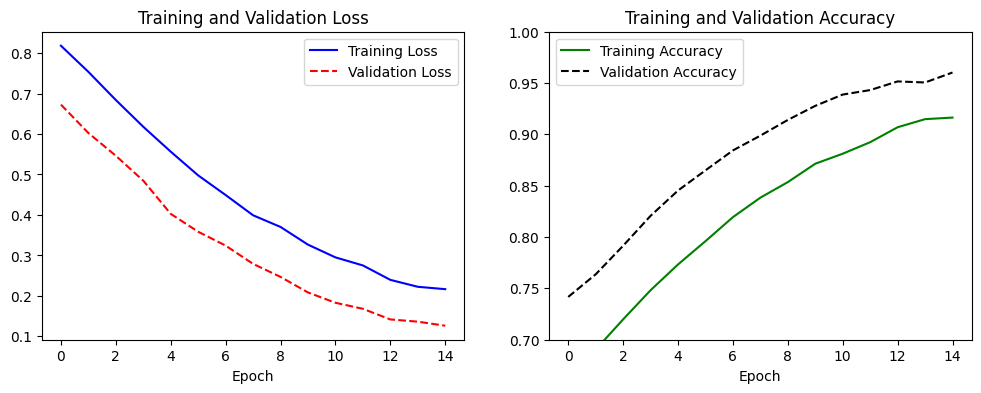

In [114]:
import matplotlib.pyplot as plt

# 그래프의 크기 설정
plt.figure(figsize=(12, 4))

# 첫 번째 subplot: 손실 및 검증 손실 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='Training Loss')  # 훈련 손실
plt.plot(history.history['val_loss'], 'r--', label='Validation Loss')  # 검증 손실
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.legend()

# 두 번째 subplot: 정확도 및 검증 정확도 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='Training Accuracy')  # 훈련 정확도
plt.plot(history.history['val_accuracy'], 'k--', label='Validation Accuracy')  # 검증 정확도
plt.xlabel('Epoch')
plt.title('Training and Validation Accuracy')
plt.ylim(0.7, 1)  # y축 범위 설정 (정확도는 0.7에서 1 사이의 값)
plt.legend()

# 그래프 표시
plt.show()

In [115]:
model.evaluate(train_X[-2000:], train_Y[-2000:])

63/63 [==============================] - 1s 18ms/step - loss: 0.0960 - accuracy: 0.9765


[0.09598615765571594, 0.9764999747276306]

In [116]:
evaluation_result = model.evaluate(train_X[-2000:], train_Y[-2000:])
print("손실:", evaluation_result[0])
print("정확도:", evaluation_result[1])

63/63 [==============================] - 1s 12ms/step - loss: 0.0960 - accuracy: 0.9765
손실: 0.09598615765571594
정확도: 0.9764999747276306


In [117]:
result_emotion = {0:"공포", 1:"분노", 2:"슬픔", 3:"중립",
                 4:"행복"}

In [125]:
import random

# 감정 카테고리에 따른 오늘의 한마디
emotion_comments = {
    "행복": ["오늘도 행복한 일들이 가득하길 바라요.", "긍정적인 에너지를 유지하세요.", "웃음이 계속되길 기대해봐요."],
    "분노": ["마음을 정리하고 힘내세요.", "분노를 이해합니다. 누군가에게 속 시원하게 털어놓아보세요.", "화를 내다보면 가끔 해소되기도 합니다."],
    "슬픔": ["슬픔이 가시길 바라요. 언제든지 이야기해도 좋아요.", "마음이 힘들 때는 편안한 곳에서 휴식을 취하세요.", "슬픔은 지나가기 마련이에요."],
    "중립": ["오늘은 중립적인 기분인가봐요. 편안한 하루 보내세요.", "평범한 하루가 가장 특별한 순간일지도 몰라요.", "중립적인 감정도 소중해요."],
    "공포": ["무서운 감정이군요. 안전한 환경에서 편안함을 찾아보세요.", "무서움을 이해해요. 함께 이야기해보는 것도 도움이 될 수 있어요.", "우리 함께 무서움을 이겨봐요."],
}

# 음식 카테고리에 따른 음식 목록
food_categories = {
    "한식": ["비빔밥", "불고기", "김치찌개", "떡볶이", "삼겹살", "전"],
    "중식": ["짜장면", "탕수육", "양장피", "깐풍기", "마파두부", "볶음밥"],
    "일식": ["초밥", "라멘", "돈까스", "우동", "텐동"],
    "양식": ["스테이크", "파스타", "피자", "카레"],
    "전체": ["비빔밥", "불고기", "김치찌개", "떡볶이", "삼겹살", "전", "짜장면", "탕수육", "양장피", "깐풍기", "마파두부", "볶음밥", "초밥", "라멘", "돈까스", "스테이크", "파스타", "피자"]
}

emotion_categories = {
    "행복": ["아이스크림", "초콜릿", "파스타", "피자"],
    "슬픔": ["토마토 수프", "죽", "따뜻한 차"],
    "공포": ["그릴치즈샌드위치", "허브차", "치킨 스프"],
    "중립": ["샐러드", "닭가슴살"],
    "분노": ["라면", "불닭볶음면", "떡볶이", "마라탕"]
}

emotion_food_comments = {
    "아이스크림": ["상쾌한 맛으로 기분을 더 환상적으로 만들어줄 수 있어요."],
    "초콜릿": ["달콤한 초콜릿은 행복한 기분을 더해줄 수 있습니다."],
    "파스타": ["특히 크림 파스타나 토마토 소스 파스타는 여운이 남아 기분 좋게 만들어줄 수 있어요."],
    "피자": ["다양한 토핑의 조합으로 특별한 날을 기념하는 데 좋아요."],

    "토마토 수프": ["따뜻한 수프는 마음을 안정시켜줄 수 있어요."],
    "죽": ["부드럽고 가벼운 음식으로 위로가 되는 효과가 있습니다."],
    "따뜻한 차": ["칼로리 없는 차는 마음을 가라앉히는 데 도움이 됩니다."],

    "그릴치즈샌드위치": ["치즈의 풍미와 따뜻한 빵이 안심감을 주는 음식 중 하나입니다."],
    "허브차": ["차 한 잔은 여유를 가져다줄 수 있습니다."],
    "치킨 수프": ["온기 있고 고소한 향이 나는 스프는 포근한 느낌을 줄 수 있습니다."],

    "샐러드": ["과도하지 않은 식사로 가벼움을 유지할 수 있어요."],
    "닭가슴살": ["과도하지 않은 식사로 가벼움을 유지할 수 있어요."],

    "라면": ["강렬한 맛이 감정을 다루는 데 도움을 줄 수 있습니다."],
    "불닭볶음면": ["매운 음식은 분노를 터뜨리는 데 도움이 될 수 있어요."],
    "떡볶이": ["강렬한 맛이 감정을 다루는 데 도움을 줄 수 있습니다."],
    "마라탕": ["매운 음식은 분노를 터뜨리는 데 도움이 될 수 있어요."],
}

# 사용자로부터 텍스트 입력 받기
test_sentence = input("하고 싶은 말을 입력해주세요. : ")
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])

# 텍스트를 모델에 입력하여 감정 예측
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=8)
prediction = model.predict(test_X_1)

# 감정 예측 결과 출력
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])
    result = prediction[idx]
    res_ind = np.argmax(result)

print("\n")

# 사용자로부터 음식 카테고리 선택 받기
cuisine_input = input("원하는 음식 카테고리를 선택해주세요 (한식, 중식, 일식, 양식, 전체): ")
cuisine = cuisine_input if cuisine_input in food_categories else "전체"

# 예측된 감정에 따라 음식 추천 함수 수정
def recommend_food(emotion, cuisine):
    food_list = food_categories[cuisine]
    return random.choice(food_list)

emotion_category = result_emotion[res_ind]
probability = prediction[0][res_ind] * 100
print(f"당신의 감정이 {emotion_category}일 확률은 {probability:.2f}%입니다.")

print("\n")

# 랜덤으로 음식 하나 추천
recommended_food = recommend_food(emotion_category, cuisine)
print("당신의 감정에 어울리는",cuisine,"음식 추천:",recommended_food)


emotion_food_list = emotion_categories.get(emotion_category, [])
selected_food = random.choice(emotion_food_list)
print("\n")
# 랜덤으로 음식과 관련된 한마디 출력
food_comments = emotion_food_comments.get(selected_food, ["음식에 관련된 한마디를 찾을 수 없습니다."])
random_food_comment = random.choice(food_comments)
print(f"오늘의 감정 {emotion_category}에 추천하는 음식: {selected_food}")
print("\n")
# 감정 카테고리에 따라 오늘의 한마디 출력
random_comment = random.choice(emotion_comments.get(emotion_category, ["해당하는 감정 카테고리의 한마디를 찾을 수 없습니다."]))
print(f"당신을 위한 오늘의 한마디: {random_comment}")

print(f"{random_food_comment}")

하고 싶은 말을 입력해주세요. : 야
1/1 [==============================] - 0s 25ms/step
['야']
[1.1975654e-04 9.9377352e-01 5.7772556e-03 3.2879092e-04 6.8166599e-07]


원하는 음식 카테고리를 선택해주세요 (한식, 중식, 일식, 양식, 전체): 양식
당신의 감정이 분노일 확률은 99.38%입니다.


당신의 감정에 어울리는 양식 음식 추천: 스테이크


오늘의 감정 분노에 추천하는 음식: 떡볶이


당신을 위한 오늘의 한마디: 마음을 정리하고 힘내세요.
강렬한 맛이 감정을 다루는 데 도움을 줄 수 있습니다.
